# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 3</span>

### Exercise 03.1 <span style="color:red"> Plain vanilla option pricing </span>

Black-Scholes theory assumes that the time evolution of the asset price is stochastic and exhibits geometric Brownian motion (GBM) with constant risk-free interest rate $r$ and volatility $\sigma$.

Black-Scholes <span style="color:blue"> analytic solution </span> for the price at time t<T:
- European Call-option price:
$$ C\left[ S(t),t \right] = S(t) N(d_1) -K e^{-r(T-t)} N(d_2) $$
- European Put-option price:
$$ P\left[ S(t),t \right] = S(t) \left[ N(d_1)-1\right] -K e^{-r(T-t)} \left[ N(d_2)-1\right]$$

where 
$$d_1 = \frac{1}{\sigma\sqrt{T-t}}\left[ \ln \left( \frac{S(t)}{K} \right) + \left( r+\frac{\sigma^2}{2} (T-t) \right)\right]$$

where $d_2 = d_1 - \sigma\sqrt{T-t}$, and where
$$ N(x) = \int_{-\infty}^{x} dz \, e^{-\frac{z^2}{2}} = \frac{1}{2} \left[ 1+ {\rm erf} \left( \frac{x}{\sqrt{2}}\right) \right]$$
is the cumulative of Gaussian $\sim \mathcal{N}(\mu=0,\sigma^2=1)$,
and where
$${\rm erf}(x) = \frac{2}{\sqrt{\pi}}\int_{0}^{x} dz \, e^{-z^2}$$

By using the following parameters: 
- asset price at $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $r=0.1$
- volatility: $\sigma=0.25$

compute at time $t=0$ **via Monte Carlo** the European call-option price, $C[S(0),0]$, and put-option price, $P[S(0),0]$:

1. <span style="color:red"> By sampling **directly** the final asset price $S(T)$</span> for a $GBM(r,\sigma^2)$
2. <span style="color:red"> By sampling the discretized $GBM(r,\sigma^2)$ path of the asset price</span> 
dividing $[0,T]$ in $10^2$ time intervals: $S(0)$, $S(t_1)$, $S(t_2)$, ... up to $S(t_{100}=T=1)$

<span style="color:red">Make four pictures for the estimation of the European call-option prices, $C[S(0),0]$ (direct and discretized), and put-option prices, $P[S(0),0]$ (direct and discretized), with their uncertainties </span> with a large number of asset prices at time $t=T$, say $M\ge 10^4$, as a function of the number of blocks, $N$</font>. <span style="color:blue"> As usual, in computing statistical uncertainties, use data blocking.</span>

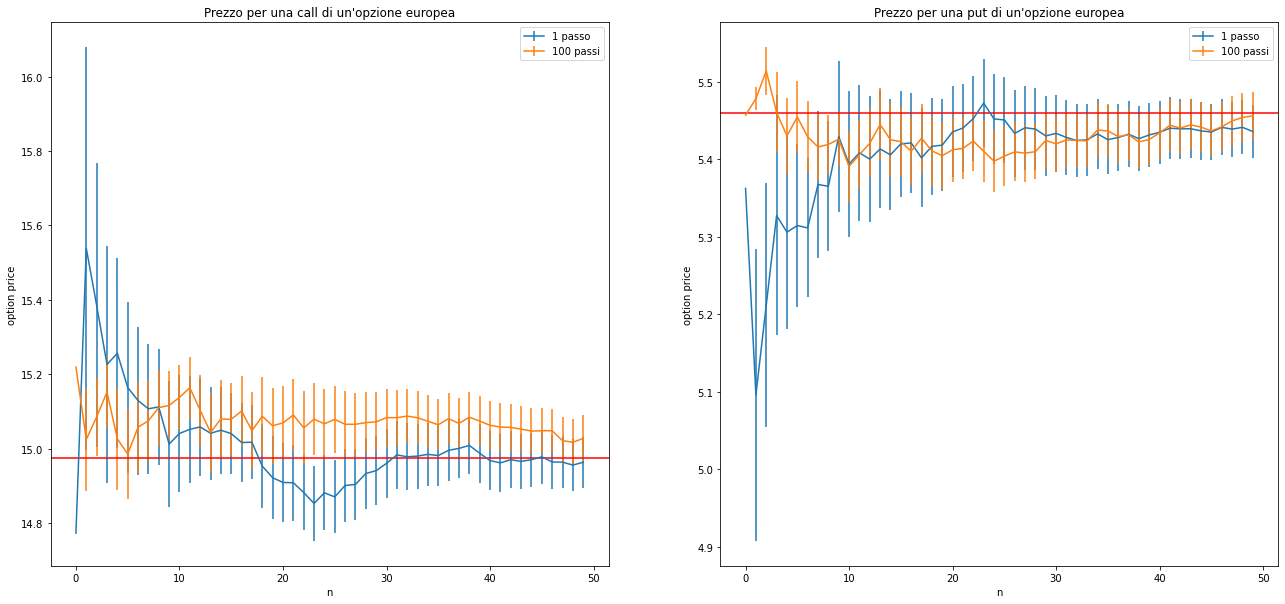

In [45]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

x, C, errC = np.loadtxt("ex3.1/out.dat", usecols=(0,8,9), unpack='true')
x1, Cp, errCp = np.loadtxt("ex3.1/out.dat", usecols=(0,2,3), unpack='true')
P, errP = np.loadtxt("ex3.1/out.dat", usecols=(11,12), unpack='true')
Pp, errPp = np.loadtxt("ex3.1/out.dat", usecols=(5,6), unpack='true')

fig, [ax0, ax1] = plt.subplots(1, 2, figsize=(22,10))

ax0.errorbar(x,C,yerr=errC, label='1 passo')
ax0.errorbar(x1,Cp,yerr=errCp, label='100 passi')
ax0.axhline(y= 14.975790778311286, color='r', linestyle='-')
ax0.set_xlabel('n')
ax0.set_ylabel('option price')
ax0.set_title('Prezzo per una call di un\'opzione europea')


ax1.errorbar(x,P,yerr=errP, label='1 passo')
ax1.errorbar(x1,Pp,yerr=errPp, label='100 passi')
ax1.axhline(y= 5.4595325819072364, color='r', linestyle='-')
ax1.set_xlabel('n')
ax1.set_ylabel('option price')
ax1.set_title('Prezzo per una put di un\'opzione europea')

ax0.legend()
ax1.legend()


I grafici mostrano come effettivamente il prezzo dell'asset non dipenda dall'incremento utilizzato.
I dati sono coerenti con quelli calcolati con la soluzione analitica.
Il data blocking è stato fatto usando 50 blocchi da 2000 passi